<a href="https://colab.research.google.com/github/pranshurastogi29/clustering-the-palsy/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [0]:
df=pd.read_csv('/content/drive/My Drive/norm.csv')

In [0]:
df.columns

Index(['Sno', 'Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)', 'Normal sl', 'norm cade', 'scan sl', 'scan caden',
       'classs'],
      dtype='object')

In [0]:
df_req = df[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)','classs']]
X  = df_req[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)']]
labels = df.classs.values

In [0]:
model = KMeans(n_clusters = 2)

In [0]:
model.fit(X.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
c = model.predict(X.values)

In [0]:
dunn(model.cluster_centers_)

0.0008647711824468926

In [0]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [0]:
purity_score(labels,c)

0.6282051282051282

In [0]:
import numpy as np
from numpy.linalg import norm


class kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.c1,self.c2 = [],[]

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_mse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.mean(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_mse(X, self.labels, self.centroids)
        self.error = np.mean(self.error)
        print('MSE',self.error)
    def return_centroids(self):
        return self.centroids
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)
    def clusters(self,X):
        d = self.predict(X)
        for i in range(len(d)):
            if d[i] == 0:
                self.c1.append(i)
            else:
                self.c2.append(i)
        return self.c1,self.c2

In [0]:
a = kmeans(n_clusters = 2)

In [0]:
b = a.fit(X.values)

MSE 333.297172903312


In [0]:
c = a.predict(X.values)

In [0]:
a.return_centroids()

array([[  0.79875   ,  94.50208333,   0.723125  ,  11.91666667],
       [  0.88962963, 141.8637037 ,   0.58138889,   7.23148148]])

In [0]:
dunn(a.return_centroids())

0.0006432484472578845

In [0]:
purity_score(labels,c)

0.6794871794871795

In [0]:
def get_cls(c,x):
  cl0,cl1 = [],[]
  for i in range(len(c)):
    if c[i] == 0:
      cl0.append(x[i])
    if c[i] == 1:
      cl1.append(x[i])
  return cl0,cl1
cl0,cl1 = get_cls(c,X.values)

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
def cluster_dist(cl0,cl1):
  d0 = euclidean_distances(cl0, cl1)
  d1 = euclidean_distances(cl1, cl0)
  A = euclidean_distances(cl0, cl0)
  C = euclidean_distances(cl1, cl1)
  d0 = np.mean(np.mean(d0,axis=1),axis=0)
  d1 = np.mean(np.mean(d1,axis=1),axis=0)
  a = np.mean(np.sum(A,axis=1)/(len(A)-1))
  c = np.mean(np.sum(C,axis=1)/(len(C)-1))
  return d0,a,c
inter_cluster,intra_cluster0,intra_cluster1 = cluster_dist(cl0,cl1)
print('inter_cluster_distance =',inter_cluster,
    "The average intra_cluster 0 is :", intra_cluster0,"The average intra_cluster 1 is :", intra_cluster1)

inter_cluster_distance = 48.00750176915253 The average intra_cluster 0 is : 23.06734453319038 The average intra_cluster 1 is : 19.43180572682104


Automatically created module for IPython interactive environment
MSE 335.4480436145546
For n_clusters = 2 The average silhouette_score is : 0.5146489859526957
MSE 175.43587846522556
For n_clusters = 3 The average silhouette_score is : 0.5160418461481555
MSE 122.54603602741346
For n_clusters = 4 The average silhouette_score is : 0.46304645714077747
MSE 80.32580278540902
For n_clusters = 5 The average silhouette_score is : 0.5000867631701892
MSE 64.98181160082267
For n_clusters = 6 The average silhouette_score is : 0.4701952147078299
MSE 52.25656257729726
For n_clusters = 7 The average silhouette_score is : 0.4615350752415276


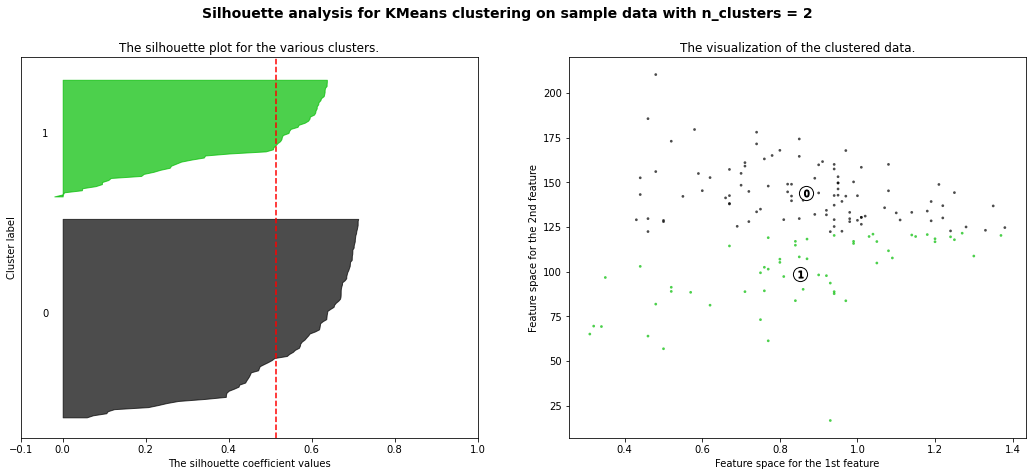

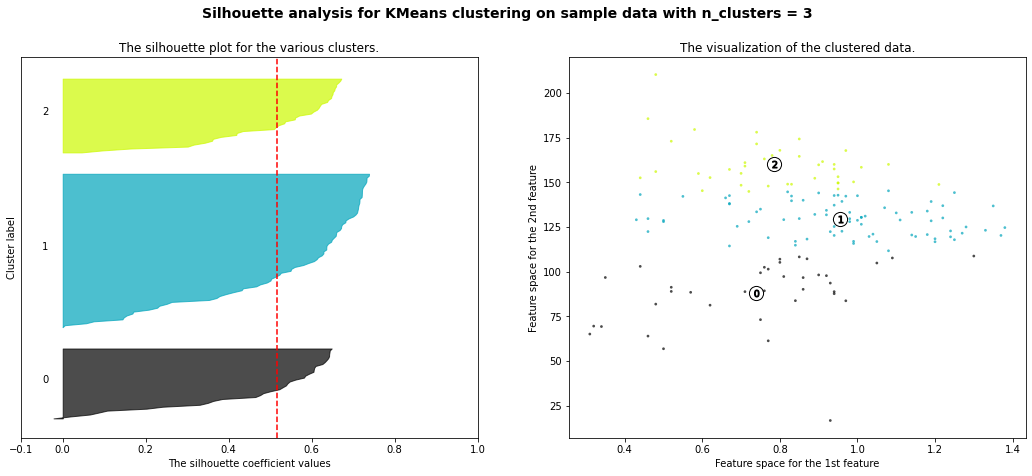

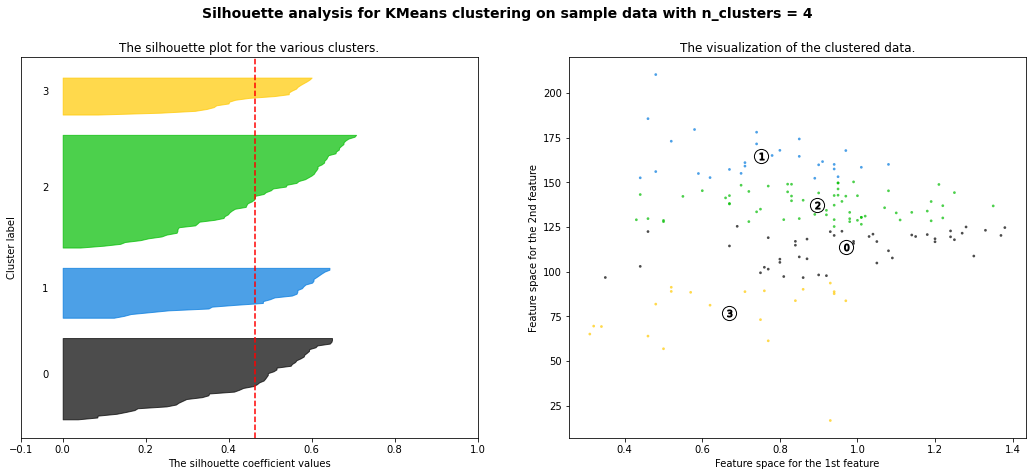

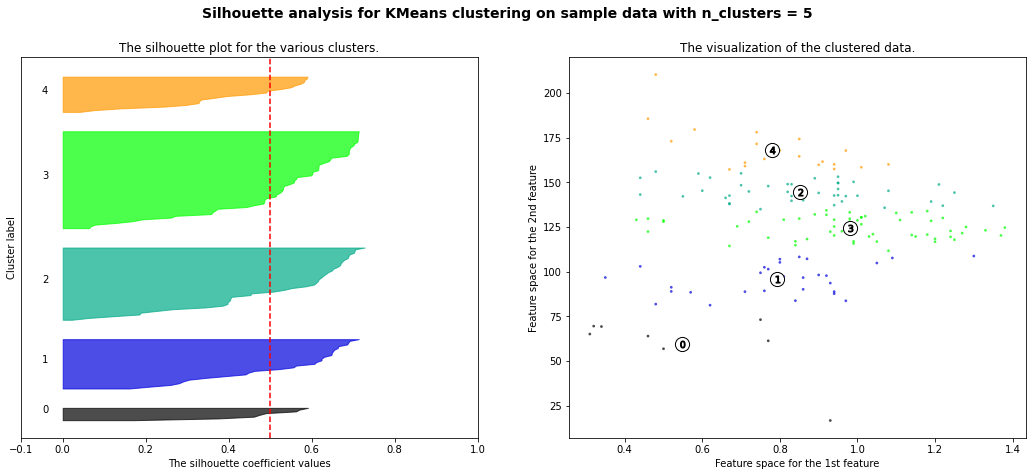

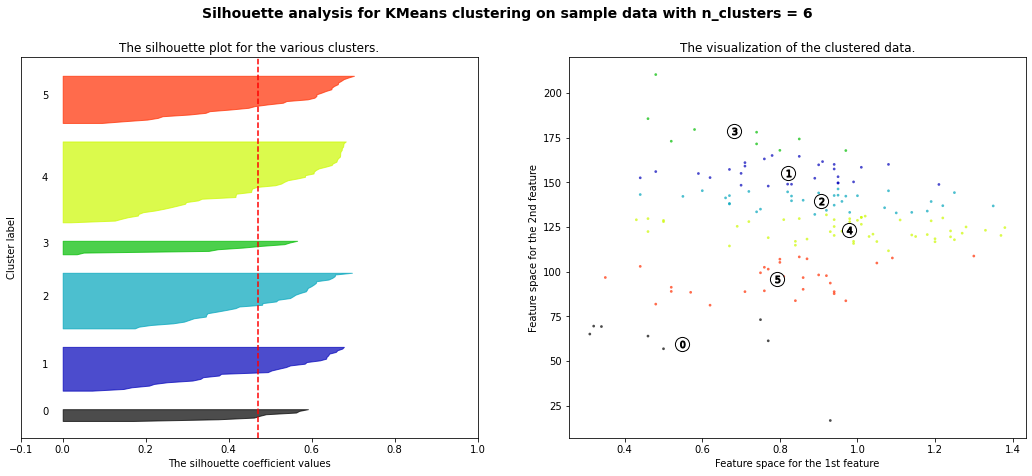

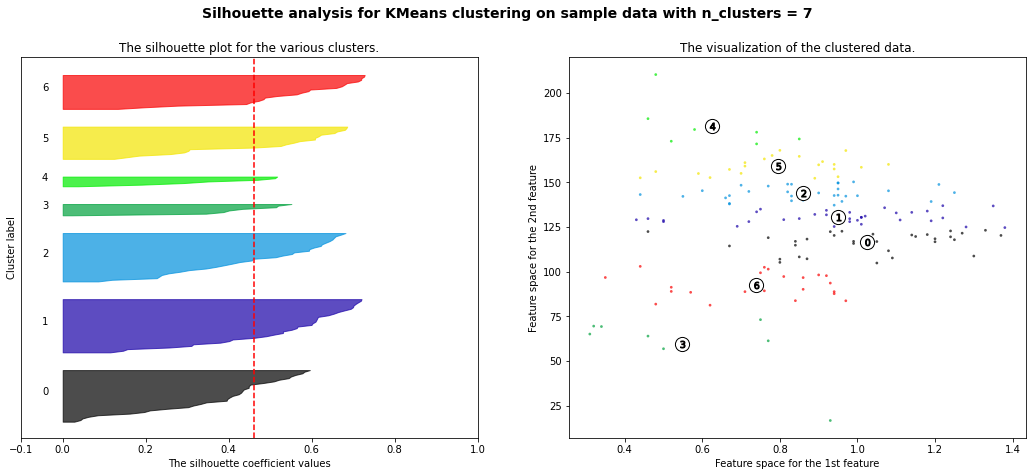

In [0]:
import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
silhouette = []
range_n_clusters = [2, 3, 4, 5, 6,7]
X  = df_req[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)']].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmeans(n_clusters=n_clusters)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.return_centroids()
    # Draw white circles at cluster centers


    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [0]:
import plotly.graph_objects as go

x = range_n_clusters

fig = go.Figure(data=go.Scatter(x=x, y=silhouette))
fig.show()